In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Read data from web-page
Read data of inflation from web page with url: [inflation](https://xn----ctbjnaatncev9av3a8f8b.xn--p1ai/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8)

Because of data reads to list file we export them to dataframe

In [2]:
url = "https://xn----ctbjnaatncev9av3a8f8b.xn--p1ai/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8"
df = pd.read_html(url)

In [3]:
inflation = pd.DataFrame(df[0])

In [4]:
inflation.head()

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
0,2024,7.44,7.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55
1,2023,11.76,10.97,3.51,2.30,2.50,3.24,4.30,5.13,6.00,6.68,7.47,7.42,7.42
2,2022,8.74,9.16,16.70,17.83,17.11,15.90,15.09,14.30,13.67,12.63,11.97,11.92,11.92
3,2021,5.19,5.67,5.78,5.52,6.01,6.51,6.47,6.69,7.41,8.14,8.40,8.39,8.39
4,2020,2.42,2.31,2.55,3.10,3.03,3.21,3.37,3.57,3.67,3.98,4.42,4.91,4.91


## Read data about salary from xlsx file
Для корректного чтени данных, они были подкорректированы внутри ексель файла:
* были удалены первые две строки для корректного чтения данных;
* были скорректированы названия стобцов, так как они были с надстрочными символами;
* были удалены сноски

In [5]:
salary = pd.read_excel("data/Rosstat Labor Market 2023.xlsx", sheet_name = None, skiprows=2)

In [6]:
salary_df_1 = pd.DataFrame(salary['sheet1'])

In [7]:
salary_df_1.columns

Index(['год',  2000,  2001,  2002,  2003,  2004,  2005,  2006,  2007,  2008,
        2009,  2010,  2011,  2012,  2013,  2014,  2015,  2016],
      dtype='object')

In [8]:
salary_df_1 = salary_df_1.rename(columns={'год':'Area'})

In [9]:
salary_df_1.columns

Index(['Area',   2000,   2001,   2002,   2003,   2004,   2005,   2006,   2007,
         2008,   2009,   2010,   2011,   2012,   2013,   2014,   2015,   2016],
      dtype='object')

In [10]:
salary_df_2 = pd.DataFrame(salary['sheet2'])
salary_df_2.columns

Index(['год', 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='object')

In [11]:
salary_df_2 = salary_df_2.rename(columns={'год':'Area'})

In [12]:
salary_df_2.columns

Index(['Area', 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='object')

## Select the areas of interest:

* Рыболовство и рыбоводство
* Строительство
* Добыча полезных исскопаемых

In [13]:
areas = ['Рыболовство, рыбоводство', 'Строительство', 'Добыча полезных ископаемых']
salary_interest_area = salary_df_1[salary_df_1['Area'].isin(areas)].copy().reset_index(drop = True)
salary_interest_area

,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
1,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895.0,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
2,Строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,21171.7,23682.0,25950.6,27701.4,29354.0,29960.0,32332.0


In [14]:
salary_interest_area_1 = salary_df_2[salary_df_2['Area'].isin(areas)].copy().reset_index(drop=True)
salary_interest_area_1

,Area,2017,2018,2019,2020,2021,2022,2023
0,"Рыболовство, рыбоводство",68032.0,75766.0,88603.8,94983.0,101547.4,121726.2,139520.0
1,Добыча полезных ископаемых,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
2,Строительство,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4


In [15]:
all_interested_areas = pd.concat([salary_interest_area, salary_interest_area_1.drop(columns=['Area'])], axis=1)

Создан датафрейм с интересующими меня сферами и зарплатами по годам


In [16]:
all_interested_areas

,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,...,37062.0,46676.0,54927.0,68032.0,75766.0,88603.8,94983.0,101547.4,121726.2,139520.0
1,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,...,58959.0,63695.0,69936.0,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
2,Строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4


## Plot salaries

In [17]:
inf_from_1999 = inflation[['Год','Всего']][:26]

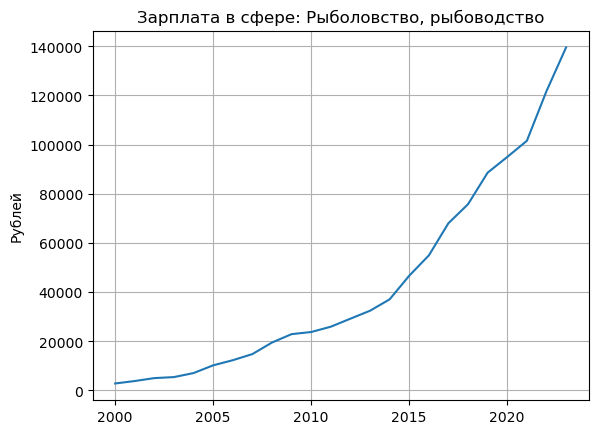

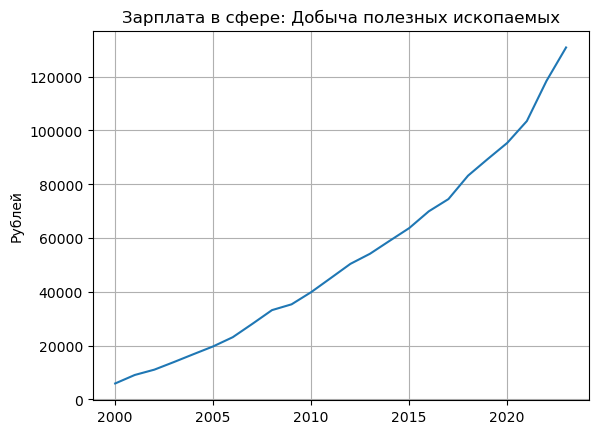

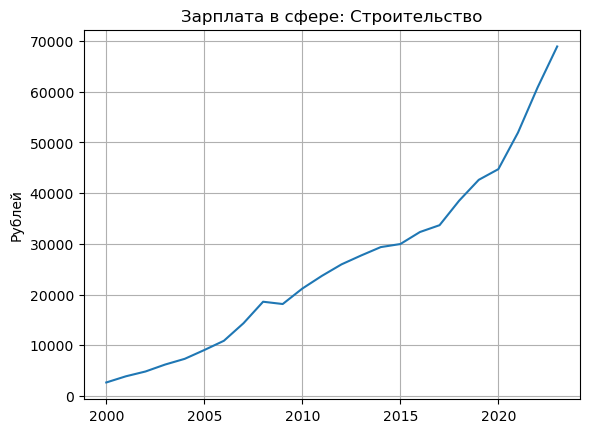

In [18]:
years = all_interested_areas.columns[1:].astype(int)
for area in all_interested_areas['Area']:
  salary = all_interested_areas[all_interested_areas['Area']==area].values[0][1:]
  plt.plot(years, salary)
  plt.title(f'Зарплата в сфере: {area}')
  plt.ylabel("Рублей")
  plt.grid(True)
  plt.show()

Из данных графиков можно сделать вывод о том, что ежегодно зарплаты в данных сферах растут. Причной может быть выход страны на мировой рынок.

Также в среднем уровень жизни в стране с 2000-го года поднялся, из чего может следовать рост спроса и внутри страны тоже.

Также не стоит забывать о нескольких пережитых кризисах. Рост зарплат может быть связан с инфляцией. Поскольку уровень инфляции увеличивает цены на товары и услуги, работники могут требовать повышения зарплаты, чтобы компенсировать ухудшение покупательной способности своих доходов.

### Salaries with inflation

In [19]:
years

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

Пересчет зарплаты текущего года к прошлому происходит по следующей формуле:

$salaryrecalc = (\frac{salary}{1+0.01*inflation_{prev\_year}})$

где

$salaryrecalc$ – зарплата за текущий год

$salary$ – зарплата за текущий год с учетом инфляции

$inflation_{prev\_year}$ – коэффициент инфляции за предыдущий год

In [20]:
all_interested_areas

,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,...,37062.0,46676.0,54927.0,68032.0,75766.0,88603.8,94983.0,101547.4,121726.2,139520.0
1,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,...,58959.0,63695.0,69936.0,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
2,Строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4


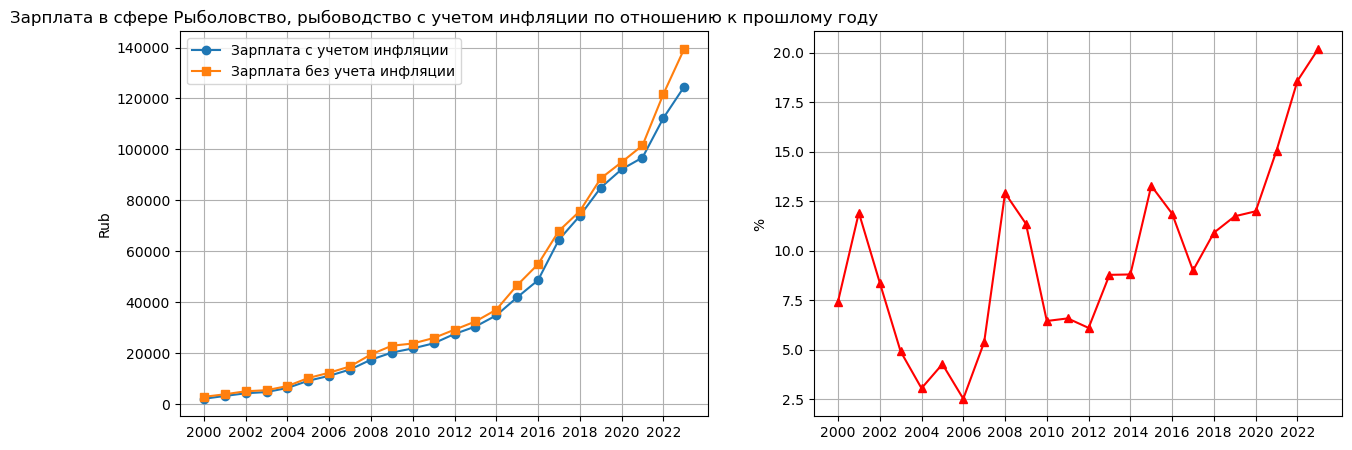

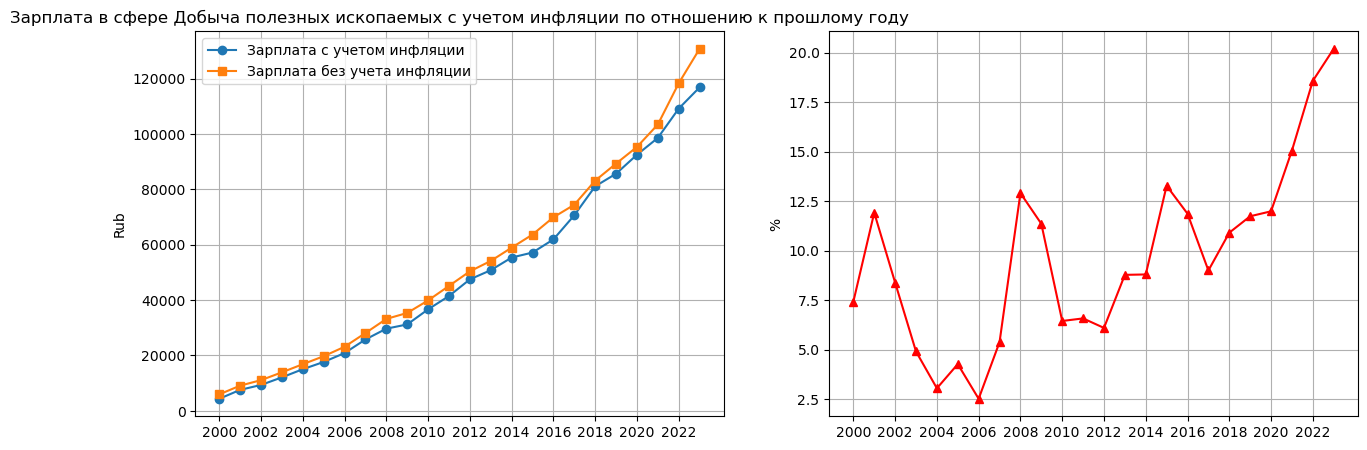

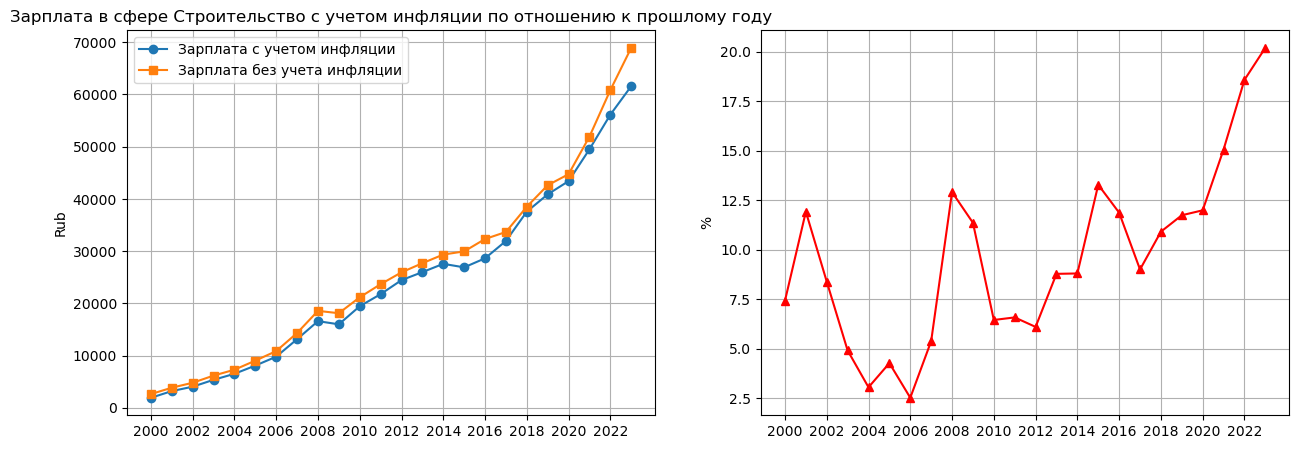

In [21]:
years = all_interested_areas.columns[1:].astype(int)
for area in all_interested_areas['Area']:
    salary_with_inf = []
    for year in years:
        salaries = all_interested_areas[all_interested_areas['Area']==area]
        salary = salaries[year].values[0]
        curr_inf =inf_from_1999[inf_from_1999['Год']==year].values[0][1]
        prev_infl = inf_from_1999[inf_from_1999['Год']==year-1].values[0][1]
        recalc_salary = salary/(1+(prev_infl*0.01))
        salary_with_inf.append(recalc_salary)      
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    axs[0].plot(years, salary_with_inf ,marker= 'o', label="Зарплата с учетом инфляции")
    axs[0].plot(years, all_interested_areas[all_interested_areas['Area']==area].values[0][1:] ,marker= 's', label="Зарплата без учета инфляции")
    axs[0].set_xticks(range(2000,2024,2))
    axs[0].set_title(f"Зарплата в сфере {area} с учетом инфляции по отношению к прошлому году")
    axs[0].set_ylabel("Rub")
    axs[0].legend()
    axs[0].grid(True)
    axs[1].plot(years, inf_from_1999['Всего'].values[1:25], marker='^', c='r')
    axs[1].set_xticks(range(2000,2024,2))
    axs[1].set_ylabel("%")
    axs[1].grid(True)
    salary_with_inf.insert(0, "Реальная зарплата в сфере: " + area)
    all_interested_areas.loc["Реальная зарплата в сфере: " + area] = salary_with_inf
    #print(salary_with_inf)    
    plt.show()




Из графиков выше можно сделать несколько выводов:

* Номинальная зарплата росла весь период
* Реальная зарплата росла весь период, но инфляция давала о себе знать, и рост номинальной зарплаты не сглаживает роста инфляции
* В период 2014-2015 годов, реальная зарплата в сфере "Строительство" снизилась. Причиной могло стать наложение санкций и следующее за ними снижение покупательской способности
* Покупательская способность падает, как результат расхождения реальной и номинальной зарплаты

Причинами могут быть:

  * Глобальный мировой кризис
  * Снижение цен на сырье
  * Рост инфляции

### Here are the dynamics of changes in real wages

Для показания динамики, найдем процент реальной зарплаты от номинальной:

$dinamyc = [1- \frac{real\_salary}{nominal\_salary}] * 100 \% $

In [22]:
all_interested_areas

,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Рыболовство, рыбоводство",2845.600000,3839.300000,5031.300000,5444.500000,7084.900000,10233.500000,12310.800000,14797.000000,19498.900000,...,37062.000000,46676.000000,54927.000000,68032.000000,75766.000000,88603.800000,94983.000000,101547.400000,121726.200000,139520.000000
1,Добыча полезных ископаемых,5940.200000,9099.200000,11080.900000,13912.400000,16841.700000,19726.900000,23145.200000,28107.500000,33206.100000,...,58959.000000,63695.000000,69936.000000,74474.100000,83178.000000,89343.700000,95359.000000,103473.500000,118375.700000,130825.600000
2,Строительство,2639.800000,3859.300000,4806.900000,6176.700000,7304.700000,9042.800000,10869.200000,14333.400000,18574.000000,...,29354.000000,29960.000000,32332.000000,33677.900000,38518.000000,42629.900000,44738.000000,51944.200000,60849.500000,68944.400000
"Реальная зарплата в сфере: Рыболовство, рыбоводство","Реальная зарплата в сфере: Рыболовство, рыбово...",2083.772701,3194.093178,4242.958340,4731.879020,6326.368426,9158.313943,11099.810657,13575.229358,17429.963350,...,34816.345702,41914.511494,48646.709769,64558.739799,73903.628560,84975.352450,92171.761281,96794.776475,112303.902574,124660.471766
Реальная зарплата в сфере: Добыча полезных ископаемых,Реальная зарплата в сфере: Добыча полезных иск...,4349.882835,7570.049917,9344.661832,12091.430558,15038.574873,17654.286737,20868.451898,25786.697248,29682.756771,...,55386.566463,57197.377874,61939.597910,70671.949136,81133.437378,85684.952527,92536.632703,98630.731103,109212.750254,116892.065761
Реальная зарплата в сфере: Строительство,Реальная зарплата в сфере: Строительство,1933.069713,3210.732113,4053.719008,5368.242656,6522.635950,8092.715232,9800.018033,13149.908257,16603.200143,...,27575.387506,26903.735632,28635.196174,31958.531031,37571.205618,40884.146926,43413.876759,49513.106472,56139.404004,61601.501072


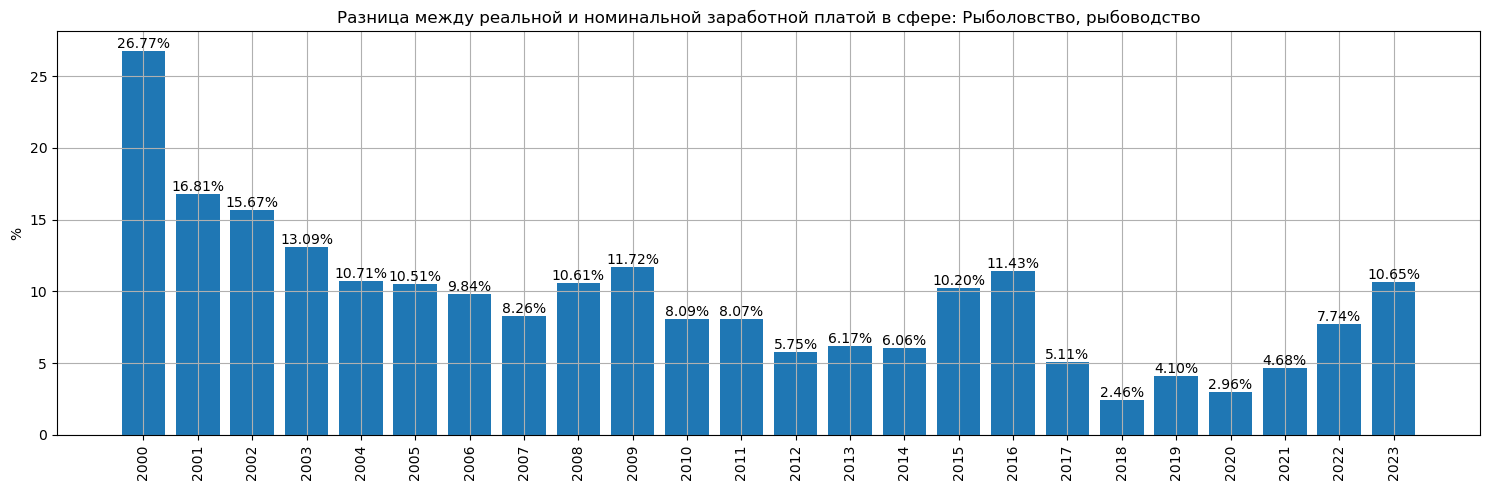

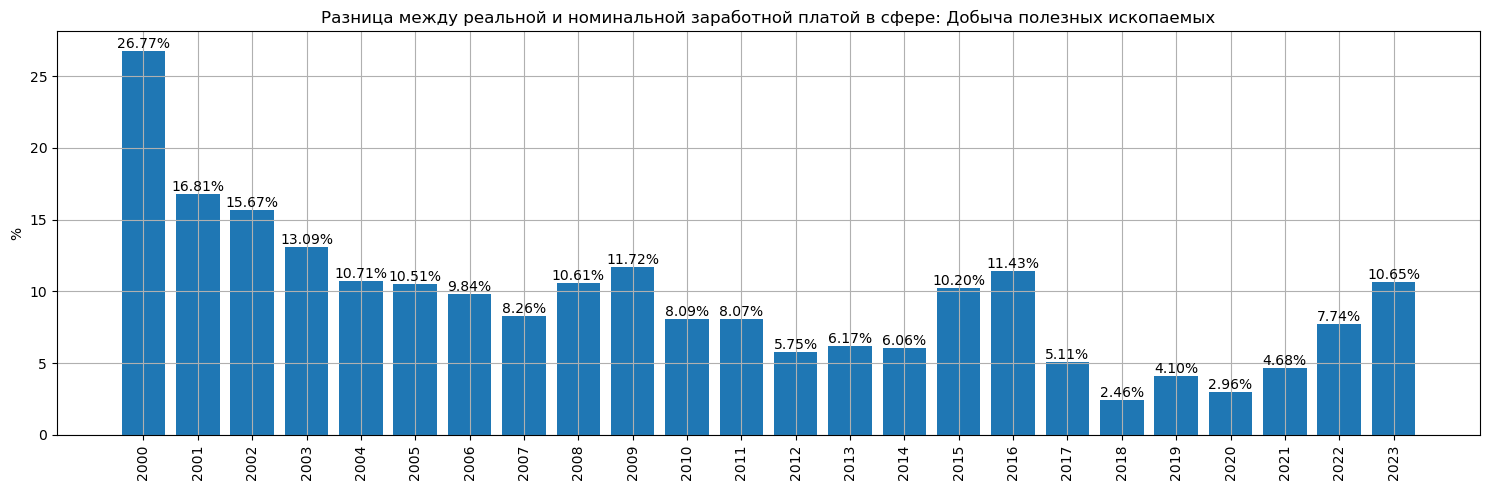

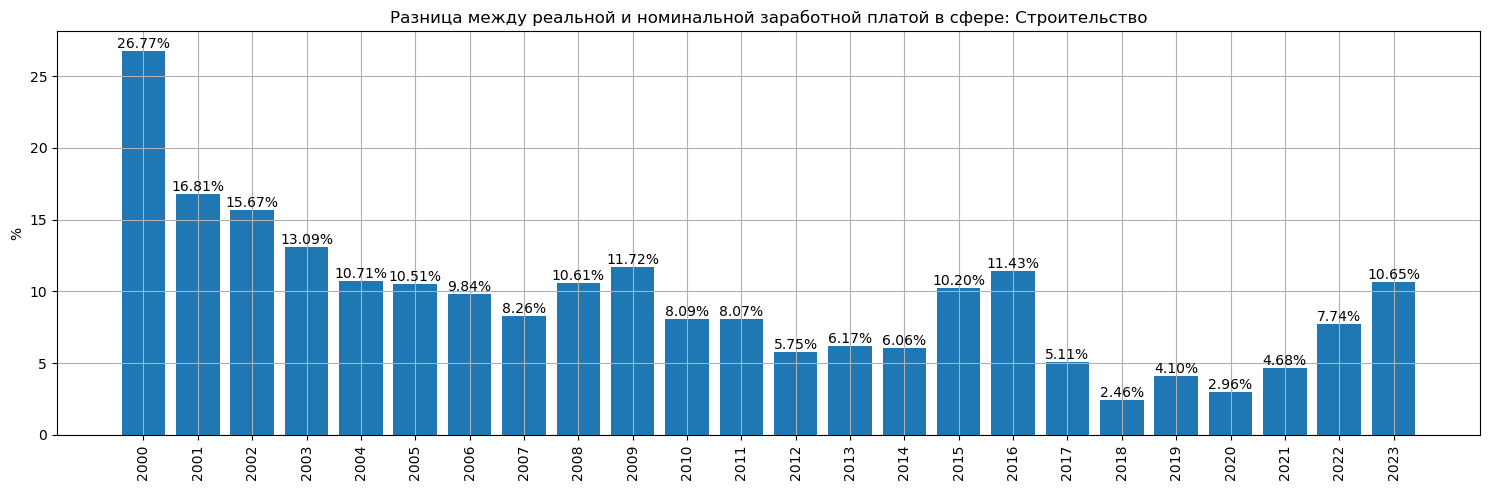

In [23]:
for area in all_interested_areas['Area'][:3]:
    nominal_salary = all_interested_areas[all_interested_areas['Area'] == area].values[0][1:]
    real_salary = all_interested_areas[all_interested_areas['Area'] == "Реальная зарплата в сфере: " + area].values[0][1:]
    values = (1-real_salary/nominal_salary)*100
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.bar(years, values)
    
    # Отображение значений
    for bar, value in zip(ax.patches, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%', ha='center', va='bottom')
    
    # Дополнительные настройки
    plt.grid(True)
    plt.title(f'Разница между реальной и номинальной заработной платой в сфере: {area}')
    plt.xticks(range(2000, 2024), rotation='vertical')
    plt.ylabel('%')
    plt.tight_layout()
    plt.show()

Из графиков выше мы видим, что в период с 2000 по 2018 разница между реальной и номинальной заработной платой уменьшалась с некоторыми выбросами, обусловленными частными экономическими проблемами, что говорит о том, что страна развивалась и был реальный рост доходов. 

Начиная с 2019 года, рост доходов прекратился.

## Let's see what's going on with GDP

In [24]:
GDP = pd.DataFrame(pd.read_excel("data/Rosstat National Accounts 1995.xlsx", sheet_name= 1,skiprows=2))
GDP

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,1428.5221,2007.8251,2342.514,2629.623,4823.2335,7305.6463,8943.5824,10830.5,13208.233779,17027.19086,21609.765489,26917.201375,33247.513229,41276.849187,38807.218575,46308.54119,55967.226762


In [25]:
GDP = pd.concat([GDP, pd.DataFrame(pd.read_excel("data/Rosstat National Accounts 1995.xlsx", sheet_name= 2,skiprows=2)).drop(columns=2011)], axis=1)
GDP

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1428.5221,2007.8251,2342.514,2629.623,4823.2335,7305.6463,8943.5824,10830.5,13208.233779,17027.19086,...,79030.040075,83087.360055,85616.083815,91843.154241,103861.651089,109608.305741,107658.13103,135773.76902,155350.359037,171041.031694


In [26]:
GDP.columns

Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023],
      dtype='int64')

In [27]:
GDP = GDP.iloc[:, 5:]
GDP

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,7305.6463,8943.5824,10830.5,13208.233779,17027.19086,21609.765489,26917.201375,33247.513229,41276.849187,38807.218575,...,79030.040075,83087.360055,85616.083815,91843.154241,103861.651089,109608.305741,107658.13103,135773.76902,155350.359037,171041.031694


In [28]:
GDP.values.flatten()

array([  7305.6463    ,   8943.5824    ,  10830.5       ,  13208.23377934,
        17027.1908603 ,  21609.76548933,  26917.2013751 ,  33247.51322882,
        41276.84918703,  38807.21857476,  46308.54118992,  55967.2267624 ,
        68103.44962768,  72985.7011301 ,  79030.04007543,  83087.3600554 ,
        85616.08381474,  91843.15424135, 103861.65108925, 109608.30574101,
       107658.13102957, 135773.76902038, 155350.35903744, 171041.03169388])

важно отметить, что, начиная с 1998 года ВВП представлен в млрд. рублей

### Plot GDP

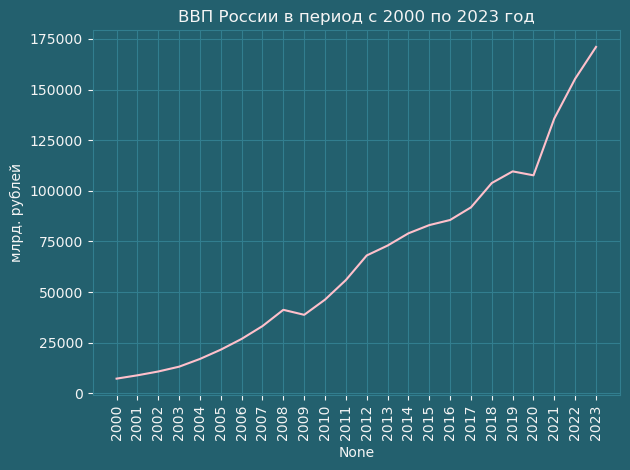

In [29]:
sns.set_style({'axes.facecolor':'23606E',
               'figure.facecolor': '23606E', 
               'axes.labelcolor': 'F5F5F5',
               'axes.axisbelow': True,
               'axes.edgecolor': '327E8F',
               'text.color':'F5F5F5',
               'xtick.color': 'F5F5F5',
              'ytick.color': 'F5F5F5',
              'grid.color': '327E8F'})
values = GDP.values.flatten().astype(float)
sns.lineplot(x=years, y=values, color='#FFC0CB')
plt.xticks(years,rotation = 'vertical')
plt.ylabel('млрд. рублей')
plt.grid(True)
plt.title("ВВП России в период с 2000 по 2023 год")
plt.tight_layout()
plt.show()

In [30]:
(1 - GDP[2008]/GDP[2009])*100

0   -6.363843
dtype: float64

Мы видим, что ВВП в среднем растет. На графике видны последствия нескольких кризисов: в 2009 году ВВП упал на 6% относительно прошлого года – последствие кризиса 2008 года, и только к 2011 году он вышел на прежний уровень роста, но после 2014 года снова темпы роста снизились.
В 2020 году ВВП упал, могу предположить, что причиной стала пандемия короновируса, но послее нее темпы роста ВВП сильно увеличились. Найти этому объяснение я не могу.

### GDP and inflation
для подсчета реального ВВП нам необходимы данные о дефляции 

In [31]:
defl = pd.read_excel("data/Rosstat National Accounts 1995.xlsx", sheet_name=9,skiprows=2)

In [32]:
defl = pd.concat([defl, pd.DataFrame(pd.read_excel("data/Rosstat National Accounts 1995.xlsx", sheet_name= 10,skiprows=2))], axis=1)

In [33]:
defl = defl.iloc[:,4:]

In [34]:
real_GDP = GDP*100/defl    

In [35]:
defl

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,137.640882,116.489519,115.613926,113.780061,120.282077,119.306095,115.170047,113.804421,117.959714,101.993723,...,107.490124,107.24963,102.844272,105.349763,109.998948,103.263187,100.89827,119.126828,115.809703,106.290062


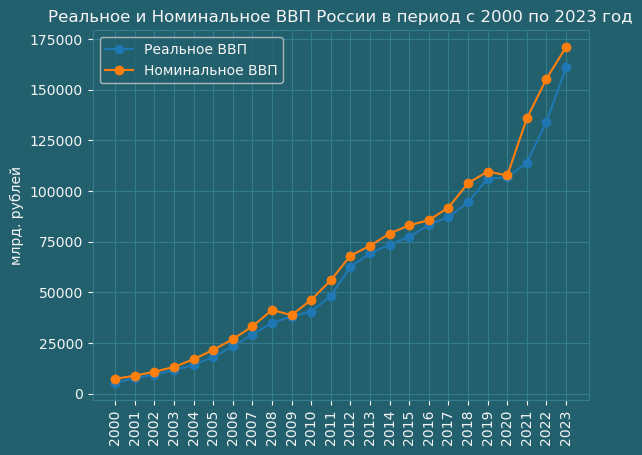

In [36]:
plt.plot(years, real_GDP.values.flatten(),marker= 'o', label="Реальное ВВП")
plt.plot(years, values,marker= 'o', label="Номинальное ВВП")
plt.xticks(range(2000,2024),rotation = 'vertical')
plt.ylabel('млрд. рублей')
plt.legend()
plt.grid(True)
plt.title("Реальное и Номинальное ВВП России в период с 2000 по 2023 год")
plt.show()

In [37]:
defl

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,137.640882,116.489519,115.613926,113.780061,120.282077,119.306095,115.170047,113.804421,117.959714,101.993723,...,107.490124,107.24963,102.844272,105.349763,109.998948,103.263187,100.89827,119.126828,115.809703,106.290062


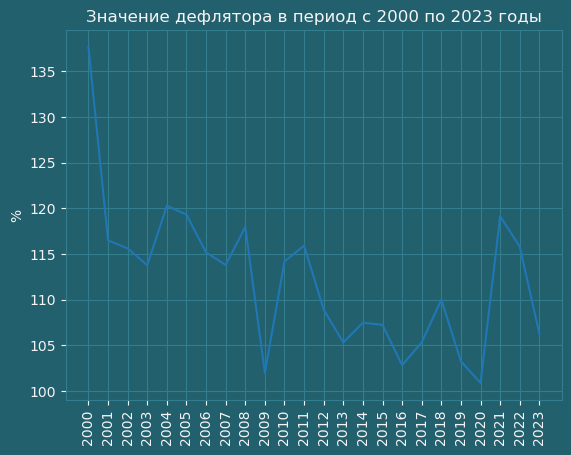

In [38]:
plt.plot(years,defl.values.flatten())
plt.title('Значение дефлятора в период с 2000 по 2023 годы')
plt.xticks(range(2000,2024),rotation = 'vertical')
plt.ylabel('%')
plt.grid(True)
plt.plot()
plt.savefig('deflation.png')

Значение реального ВВП растет вместе с номинальным с периодическими скачками. Посмотрев на график дефлятора, можно сказать, что он не достигает значения выше 20%, что может быть обусловлено действиями государства по его сдерживанию.
Периоды:
2008-2009:
Глобальный финансовый кризис.
2014-2015:
Снижение цен на нефть.
2022-2024:
Санкции против России.

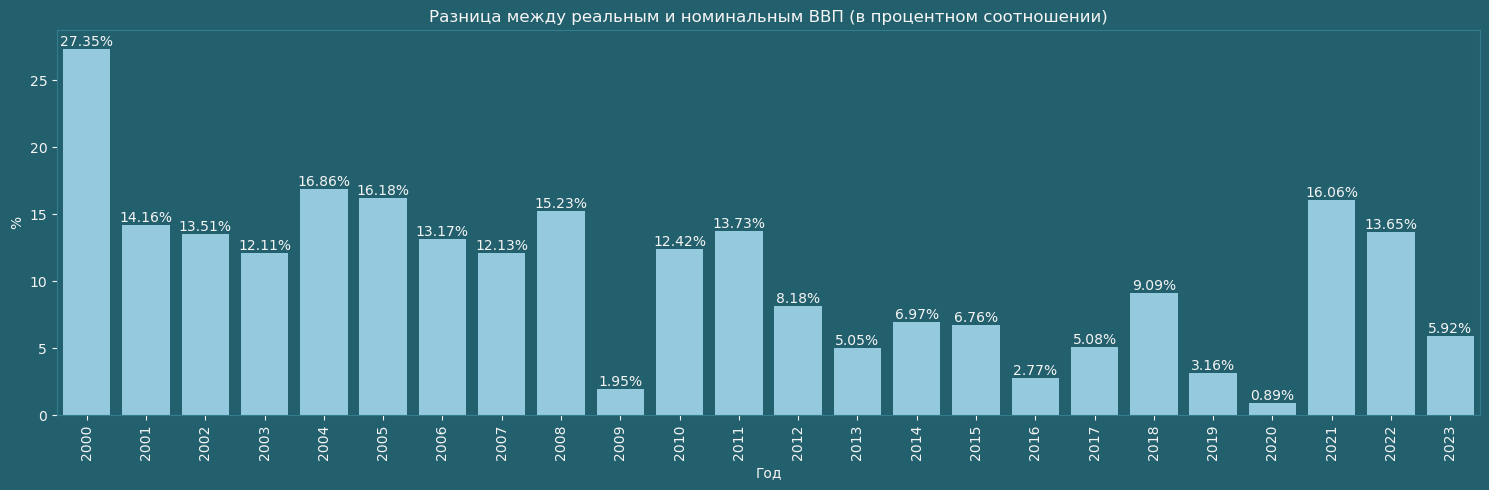

In [39]:
# Расчет разницы
values = ((1 - real_GDP.values.flatten() / GDP.values.flatten()) * 100)
values = np.round(values,2)

plt.figure(figsize=(15, 5))
sns.barplot(x=years, y=values, color='skyblue')

# Добавление значений над столбцами
for i, value in enumerate(values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

# Дополнительные настройки
plt.grid(which = 'minor')
plt.title('Разница между реальным и номинальным ВВП (в процентном соотношении)')
plt.xlabel('Год')
plt.ylabel('%')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()